# Energy generation and capacity forecast

In [19]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential


plt.rcParams["figure.figsize"] = (16,10)
sns.set_style("whitegrid")

In [11]:
energy_data = pd.read_csv("data/daily_enery_data.csv", index_col='date')
energy_data

,generacion_GWh,capacidad_efectiva_neta_mv,str_date
date,,,
2000-01-01,87.924,11806.970,2000 enero 01
2000-01-02,88.754,11806.970,2000 enero 02
2000-01-03,105.884,11806.970,2000 enero 03
2000-01-04,109.207,11806.970,2000 enero 04
2000-01-05,109.069,11806.970,2000 enero 05
...,...,...,...
2020-09-15,203.681,19866.117,2020 septiembre 15
2020-09-16,196.657,19326.117,2020 septiembre 16
2020-09-17,202.818,19326.117,2020 septiembre 17


# Data Exploration

In [22]:
energy_data[['generacion_GWh', 'capacidad_efectiva_neta_mv']].describe()

,generacion_GWh,capacidad_efectiva_neta_mv
count,7564.000000,7564.000000
mean,155.923453,14532.188154
std,26.615936,1660.981658
min,86.532000,11802.970000
25%,134.665250,13335.840000
50%,156.150500,13519.200000
75%,178.504000,16229.848000
max,216.153000,19866.117000


In [16]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7564 entries, 2000-01-01 to 2020-09-19
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   generacion_GWh              7564 non-null   float64
 1   capacidad_efectiva_neta_mv  7564 non-null   float64
 2   str_date                    7564 non-null   object 
dtypes: float64(2), object(1)
memory usage: 556.4+ KB


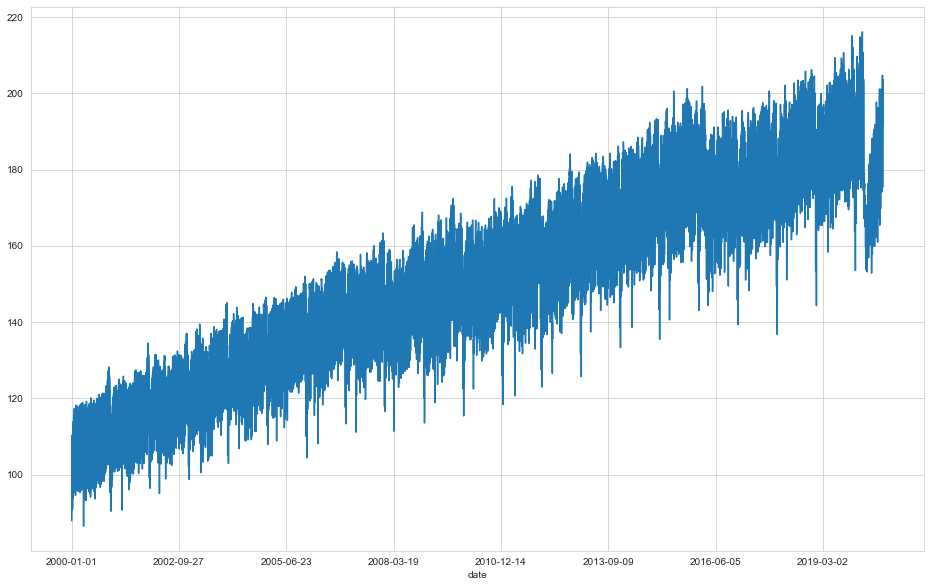

In [20]:
energy_data['generacion_GWh'].plot()

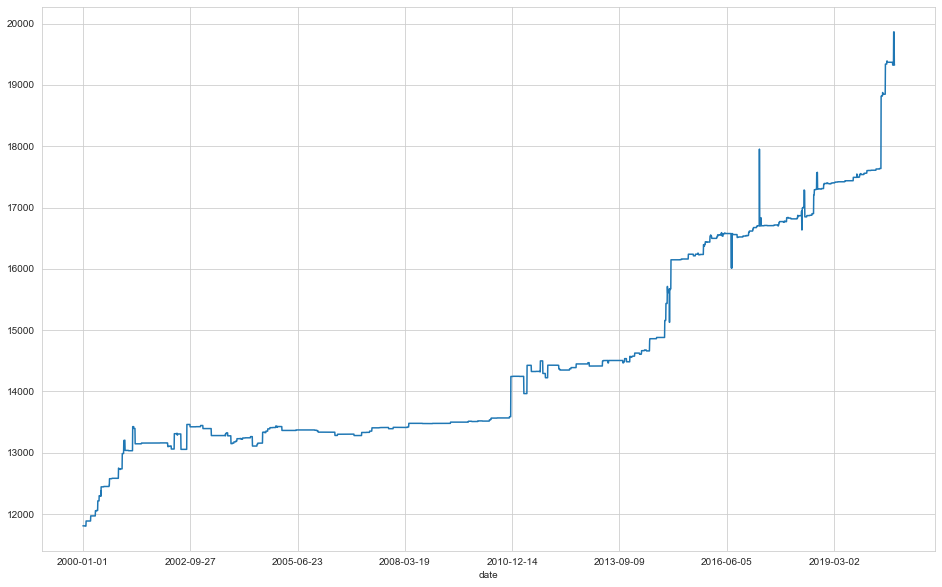

In [21]:
energy_data['capacidad_efectiva_neta_mv'].plot()

# LSTM Neural Network

Source https://wiki.pathmind.com/lstm

In [9]:
# Defining the number of neurons in the LSTM layer
n_layer = 50

# Defining how many lags will be used in the time series
n_lag = 3

# Defining the model
model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))

# The objective functions which will be minimized is mean squared error (mse)
model.compile(optimizer='adam', loss='mse')

In [10]:
class DeepLearningUTSModel:
    
    
    def __init__(self, data, epochs=10):
        self.epochs = epochs
    
    
    def create_ts_sequences(self, series, lag):
        """Create vectors along a time series with
        an specified number of lags"""
        
        X, y = [], []
        
        for t in range(len(series)):
            
            # Index + defined_lag t = [t-1, t-2, ..., t-lag]
            t_plus_lag = i + lag
            
            if t_plus_lag > len(series)-1:
                break
            
            X_seq, y_seq = series[i:t_plus_lag], series[t_plus_lag]
            
            # Append arrays to the 
            X.append(X_seq)
            y.append(y_seq)
            
            return np.array(X), np.array(y)
        
    def vanillaLSTM(self, lags, n_features=1):
        """Minimalist LSTM model
            
           n_features=1 for univariate time series
        """
        
        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(lags, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        
        
        model.fit(X_train, y_train, epochs=self.epochs, verbose=0)
        
        self.model = model

        return model
        
    
        